In [41]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("../res/salaries.csv")
df

,company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [43]:
label_encoder = LabelEncoder()
cols = ["company", "job", "degree"]

for col in cols:
    df[col] = label_encoder.fit_transform(df[col])

df

,company,job,degree,salary_more_than_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [44]:
x = df.drop("salary_more_than_100k", axis = 1)
x

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [45]:
y = df["salary_more_than_100k"]
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_than_100k, dtype: int64

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [47]:
decisionTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [48]:
print("Accuracy score:", decisionTree.score(x_test, y_test))

Accuracy score: 1.0


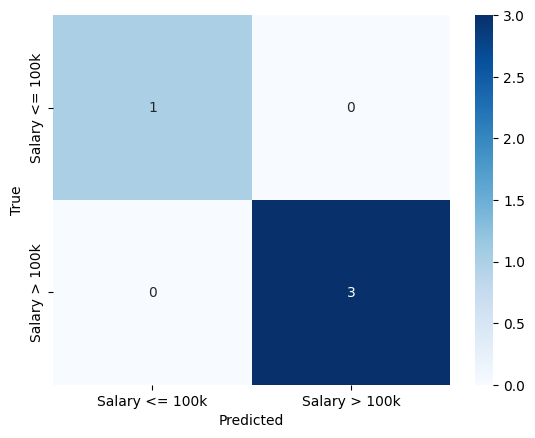

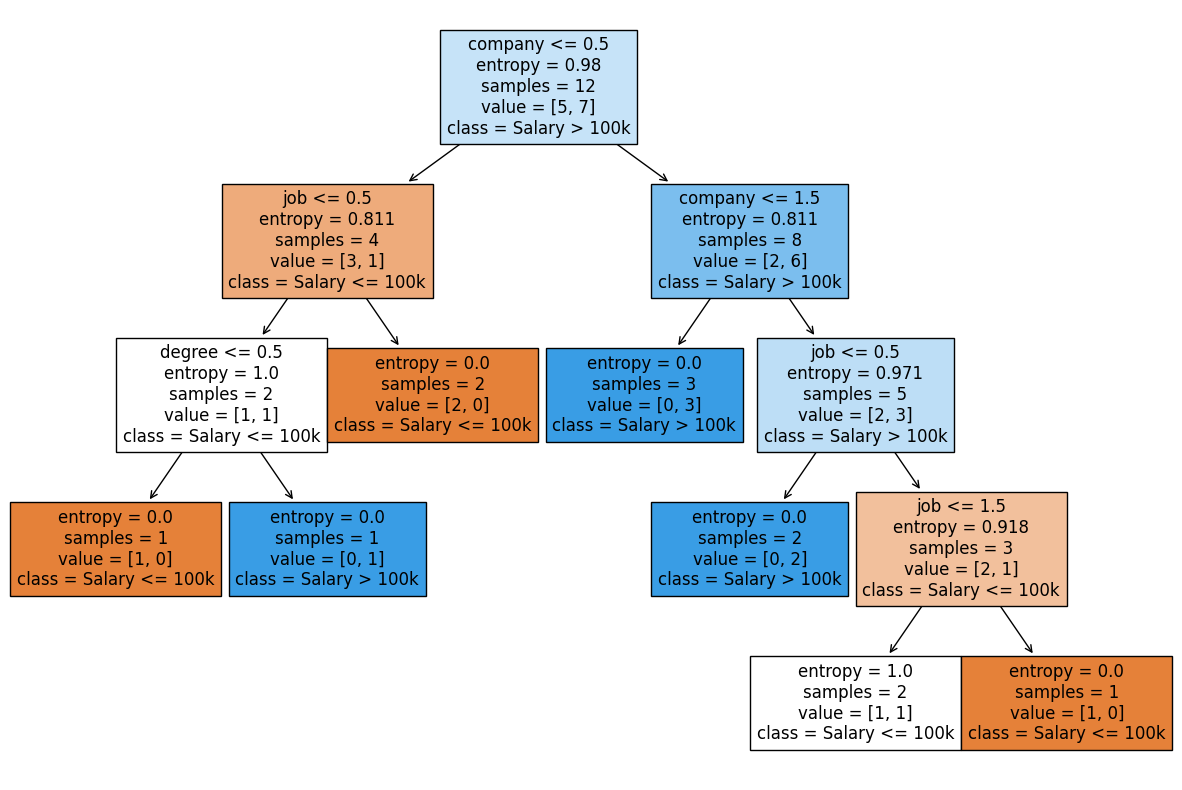

In [49]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_test)

# Print the confusion matrix in a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Salary <= 100k', 'Salary > 100k'], yticklabels=['Salary <= 100k', 'Salary > 100k'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decisionTree, filled=True, feature_names=list(x.columns), class_names=['Salary <= 100k', 'Salary > 100k'])
plt.show()